In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
from pylops.utils.seismicevents import makeaxis, linear2d
from pylops.utils.wavelets import ricker
import random

In [189]:
def MakeSeismic(samples, noise_level=0.3 ):

    """Simple generation of noisy synthetic linear seismic events. 
        Inputs = Number of samples in your dataset you want
        noise_level = Guassian noise level that gets added to seismic"""


    # empty list to be filled with numpy arrays
    clean_signal = []
    noise = []
    noisy_signal = []

    # Parameters for the seismic canvas
    par = {'ox':0, 'dx':12.5, 'nx':128, # offsets
       'ot':0, 'dt':0.004, 'nt':128, # time
       'f0': random.randint(5,30), 'nfmax': 50}
    
    # Make canvas
    t, t2, x, y = makeaxis(par)
    # Make wavelet
    wav = ricker(np.arange(41) * par['dt'],f0=par['f0'])[0]

    # Parameters for events
    v = 1500
    ang_range = 70
    amp_range = 2
    i = 0
    while i <= samples: 
        # Time of events
        t0 = [random.uniform(t.min(),t.max())*0.8, random.uniform(t.min(),t.max())*0.8, random.uniform(t.min(),t.max())*0.8]
        # Angle of events
        theta = [random.uniform(-ang_range,ang_range),random.uniform(-ang_range,ang_range),random.uniform(-ang_range,ang_range)]
        # Ampltidues of events
        amp = [random.uniform(-amp_range,amp_range), random.uniform(-amp_range,amp_range), random.uniform(-amp_range,amp_range)]
        # Making events
        mlin, mlinwav = linear2d(x, t, v, t0,theta, amp, wav)
        # Creating noise
        n = np.random.normal(loc=0,scale=1.0,size=mlinwav.shape)*noise_level
        s = mlinwav
        # Adding noise
        ns = signal+noise

        clean_signal.append(s)
        noise.append(n)
        noisy_signal.append(ns)
        i +=1

    return clean_signal, noise, noisy_signal



In [253]:
par = {'ox':0, 'dx':12.5, 'nx':128, # offsets
       'ot':0, 'dt':0.004, 'nt':128, # time
       'f0': random.randint(5,30), 'nfmax': 50} 

In [254]:
# Make canvas
t, t2, x, y = makeaxis(par)

In [255]:
# Make wavelet
wav = ricker(np.arange(41) * par['dt'],f0=par['f0'])[0]

In [256]:
[random.uniform(t.min(),t.max())*0.8,random.uniform(t.min(),t.max())*0.8]

[0.3163612357307331, 0.28436353023111377]

In [275]:
v = 1500
t0 = [random.uniform(t.min(),t.max())*0.8, random.uniform(t.min(),t.max())*0.8, random.uniform(t.min(),t.max())*0.8]
theta = [random.uniform(-50,50),random.uniform(-50,50),random.uniform(-50,50)]
amp = [random.uniform(-2,2), random.uniform(-2,2), random.uniform(-2,2)]

mlin, mlinwav = linear2d(x, t, v, t0,theta, amp, wav)

In [276]:
noise = np.random.normal(loc=0,scale=1.0,size=mlinwav.shape)*0.5

signal = mlinwav

noisy_signal = noise+mlinwav

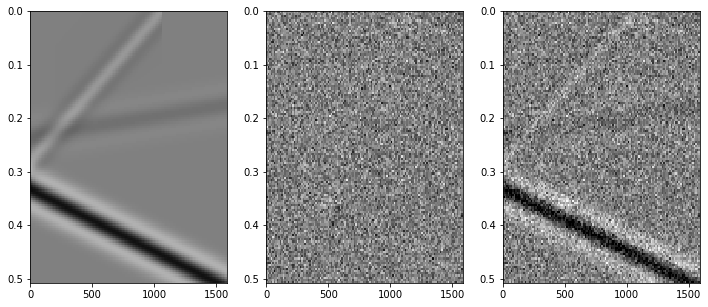

In [277]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
axs[0].imshow(mlinwav.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[1].imshow(noise.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
axs[2].imshow(noisy_signal.T, aspect='auto', interpolation='nearest',
              vmin=-2, vmax=2, cmap='gray',
              extent=(x.min(), x.max(), t.max(), t.min()))
